In [2]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
churn_data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

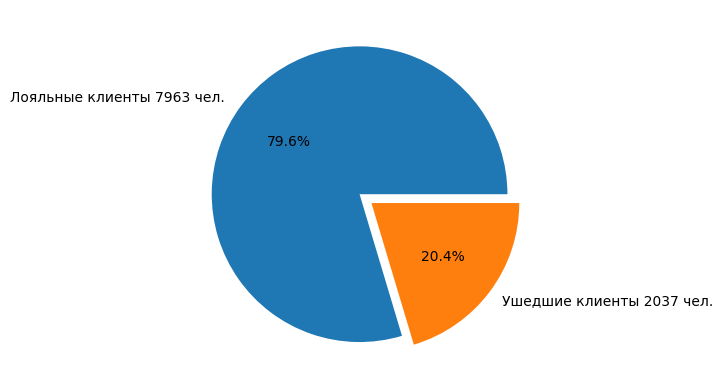

In [5]:
Vals = [7963, 2037]
plt.pie(Vals, 
        labels = ['Лояльные клиенты 7963 чел. ', 'Ушедшие клиенты 2037 чел. '],
        explode = (0, 0.1),
        autopct='%1.1f%%'
        )

plt.show()

9.1
На данной диаграмме представлено соотношение лояльных и ушедших клиентов банка. Исходя из представленных данных можно сделать вывод что чуть более 20% клиентов не довольны данным банком, что должно вызывать обеспокоенность у менеджмента и руководства банка.
Для отображения зависимости я выбрал именно круговую диаграмму, потому что лояльные и ушедшие клиенты относятся к одной группе (клиенты) и сравнивается всего два показателя.

In [6]:
df_churn_data = churn_data[churn_data.Balance >= 2500]
df_churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

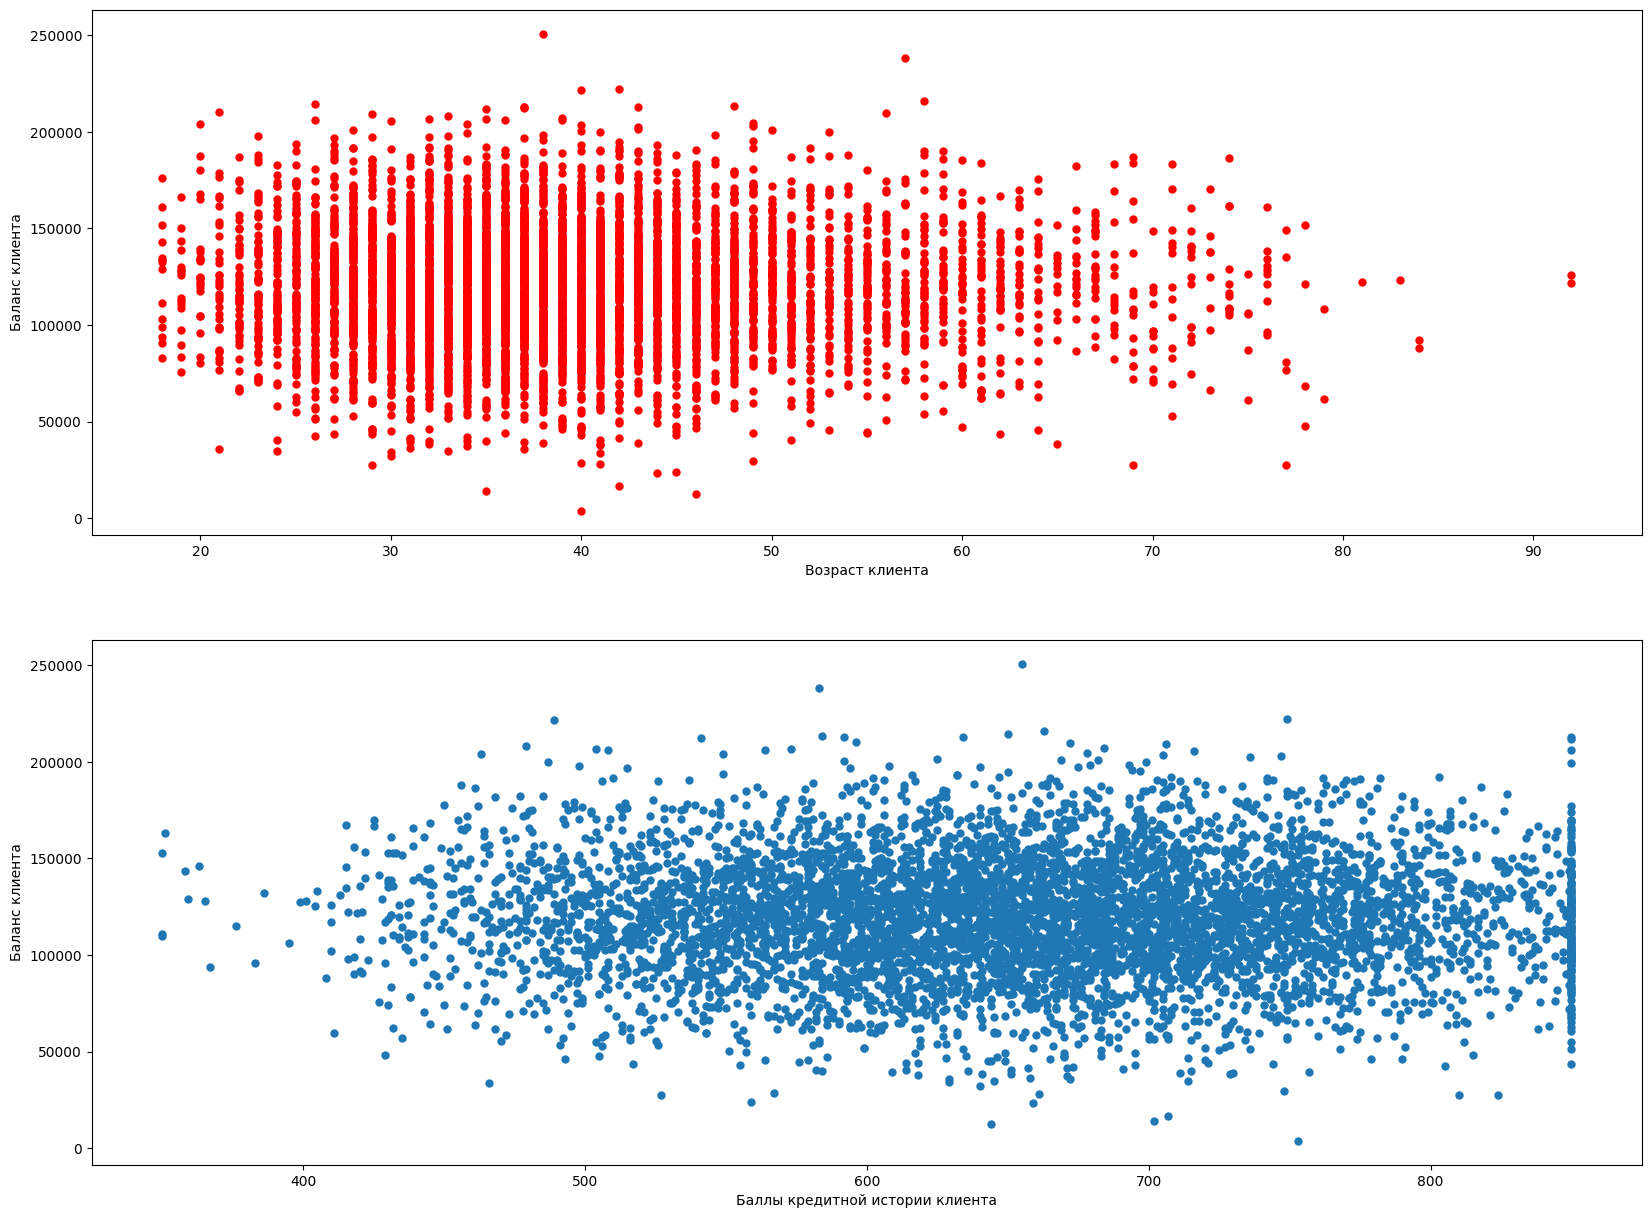

In [8]:
fig, ax = plt.subplots(2, figsize=(20, 15))
ax[0].scatter(x = df_churn_data['Age'], y = df_churn_data['Balance'], color = "red", linewidths = 0.01)
ax[0].set_xlabel("Возраст клиента")
ax[0].set_ylabel("Баланс клиента")

ax[1].scatter(x = df_churn_data['CreditScore'], y = df_churn_data['Balance'], linewidths = 0.01)
ax[1].set_xlabel("Баллы кредитной истории клиента")
ax[1].set_ylabel("Баланс клиента")

plt.show()

9.2
На данных диаграмах показано распределение баланса пользователей, у которых на счету больше 2 500 долларов в зависимости от их возраста и кредитной истории.
Исходя из данных представленных в данных графиках можно сделать вывод:

1) Основными вкладчиками являются клиенты в возрасте от 25 до 46 лет и их вклады в большей массе составляют от 700 до 170 тысяч долларов.
2) Клиенты с кредитной историей от 550 и выше баллов 

Для отображения показателей я использовал диаграмму рассеивания, потому что на ней проще передать взаимосвязь данных при большом количестве показателей (как в нашем случае).

[Text(0.5, 0, 'Лояльность клиента (0-лояльный, 1-ушедший)'),
 Text(0, 0.5, 'Баланс клиента')]

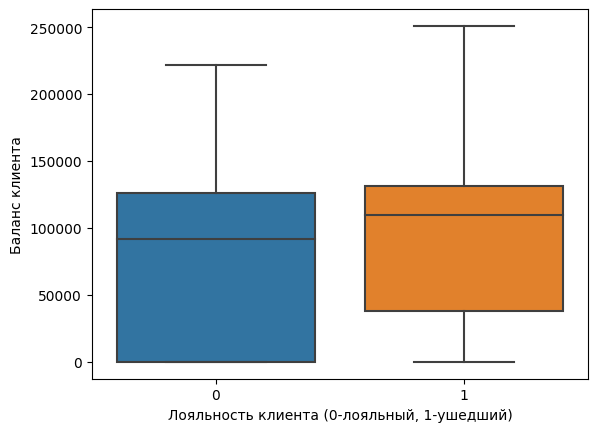

In [9]:
sns.boxplot(x='Exited', y='Balance', data=churn_data).set(
 xlabel='Лояльность клиента (0-лояльный, 1-ушедший)', 
 ylabel='Баланс клиента')

9.3
На текущем графике отображена зависимость сумм на накопительном счёте ушедших и лояльных клиентов из которой можно сделать выводы:
Уходят из банка клиенты с вкладами от 40000 долларов, вероятнее всего, это люди кторые разбираются в инвестировании и нашли для себя более выгодное предложение по вкладу в
других банках либо сферах инвестирования. Так же на диаграмме заметно большое смещение лояльных клиентов к нулю, это вызвано большим количеством клиентов с нулевым балансом. Стоит отдельно рассмотреть клиентов с нулевым балансом.
Для отображения зависимости выбрал коробчатую диаграмму так как на ней проще всего сравнить два показателя с большим количеством статистических данных.

[Text(0.5, 0, 'Лояльность клиента (0-лояльный, 1-ушедший)'),
 Text(0, 0.5, 'Возраст клиента')]

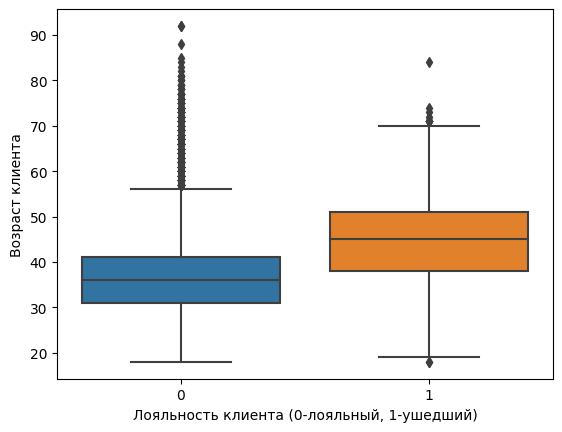

In [10]:
sns.boxplot(x='Exited', y='Age', data=churn_data).set(
 xlabel='Лояльность клиента (0-лояльный, 1-ушедший)', 
 ylabel='Возраст клиента')


9.4
Банку стоит обратить внимание на клиентов в взрасте 38-52 года, так как основной отток формирует именно эта возрастная категория,что наглядно представленно на построенном графике.
Для отображения зависимости выбрал коробчатую диаграмму так как на ней проще всего сравнить два показателя с большим количеством статистических данных.

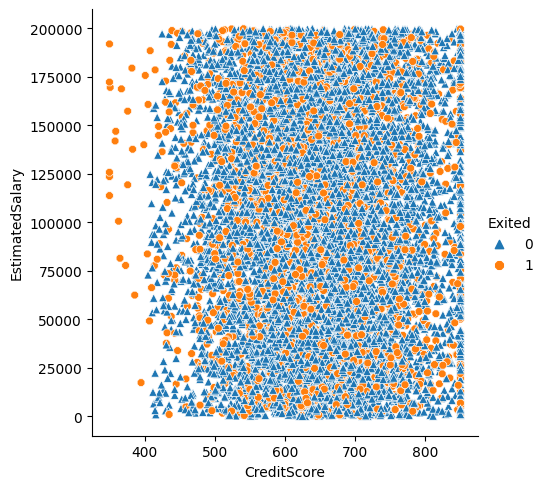

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(
  x = churn_data['CreditScore'],
  y = churn_data['EstimatedSalary'],
  hue = churn_data['Exited'],
  style=churn_data['Exited'],
  markers= {0:'^',1:"8"},
  
)


9.5
Исходя из данных, предсьавленных в данном графике можно сделать вывод что чаще из банка уходят клиенты с низким кредитным рейтингом. Так же основную массу ушедших составляют клиенты с предпологаемым доходом свыше 25000 долларов, что еще раз свидетельствует о том что конкуренты дают более выгодные условия.


In [12]:
churn_data.groupby('Exited')['Gender'].value_counts()

Exited  Gender
0       Male      4559
        Female    3404
1       Female    1139
        Male       898
Name: Gender, dtype: int64

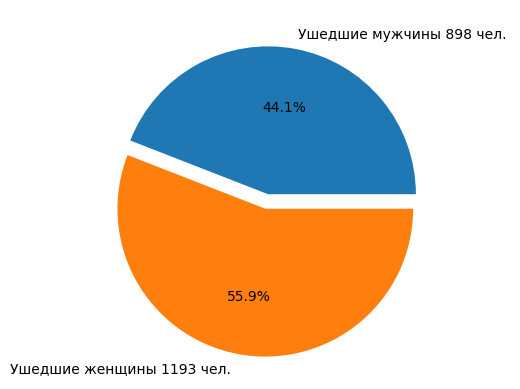

In [25]:
Vals = [898, 1139]
plt.pie(Vals, 
        labels = ['Ушедшие мужчины 898 чел. ', 'Ушедшие женщины 1193 чел. '],
        explode = (0, 0.1),
        autopct='%1.1f%%',
        )

plt.show()

9.6
На данной диаграмме отображено соотношение ушедших из банка клиентов мужчин и женщин, с не большим перевесом лидируют женщины.

Для отображения зависимости я выбрал круговую диаграмму, так как на ней проще и нагляднее всего отобразить звисимость двух признаков + обе сравниваемые подгруппы относятся к одной группе (ушедшие клиенты).

Text(0.5, 1.0, 'График зависимости ушедших клиентов от количества используемых ими продуктов банка')

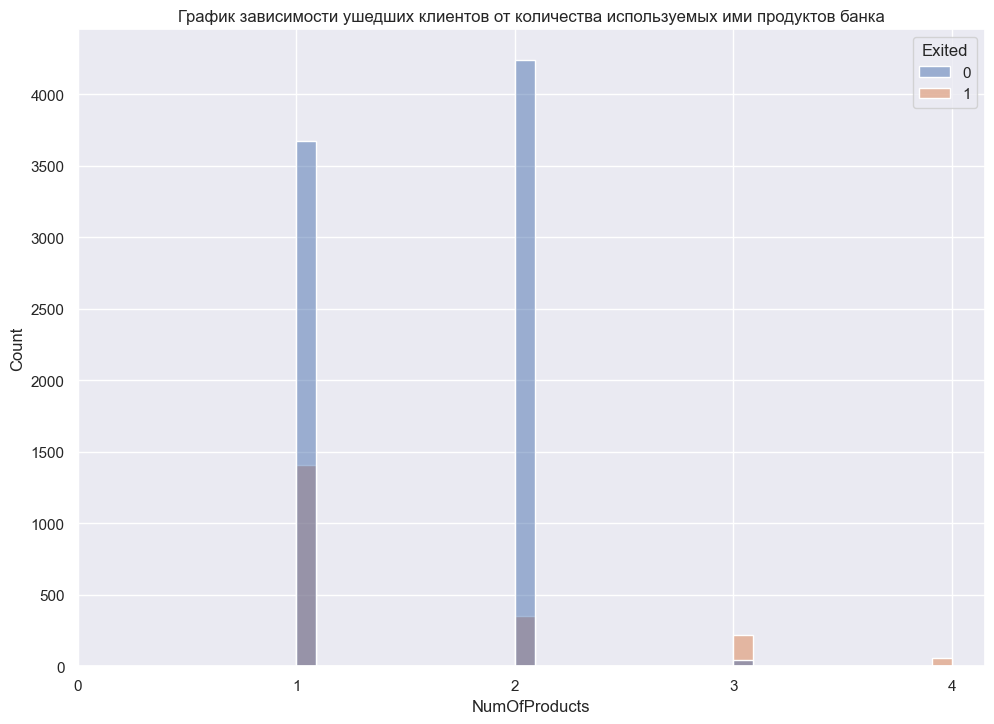

In [29]:
ax = sns.histplot(data=churn_data, x="NumOfProducts", hue="Exited")


labels = [0, 1, 2, 3, 4]

x = np.arange(len(labels))
ax.set_xticks(x, labels)
ax.set_title('График зависимости ушедших клиентов от количества используемых ими продуктов банка')

9.7
Текущий график отображает количество приобритенных продуктов среди ушедших клиентов. Исходя из представленных данных можно сделать вывод что ушедшие клиенты использовали 1-2 продукта и уходили к конкурентам. Довольно печальная картина с клиентами, которые воспользовались 3 и 4 продуктами, там доля ушедших клиентов намного превышает лояльных, а с 4-мя продуктами так вообще составляет 100%, стоит обратить внимание на эту проблему, пока она не переросла в крах компании.

In [15]:
churn_data.groupby('Exited')['IsActiveMember'].value_counts()

Exited  IsActiveMember
0       1                 4416
        0                 3547
1       0                 1302
        1                  735
Name: IsActiveMember, dtype: int64

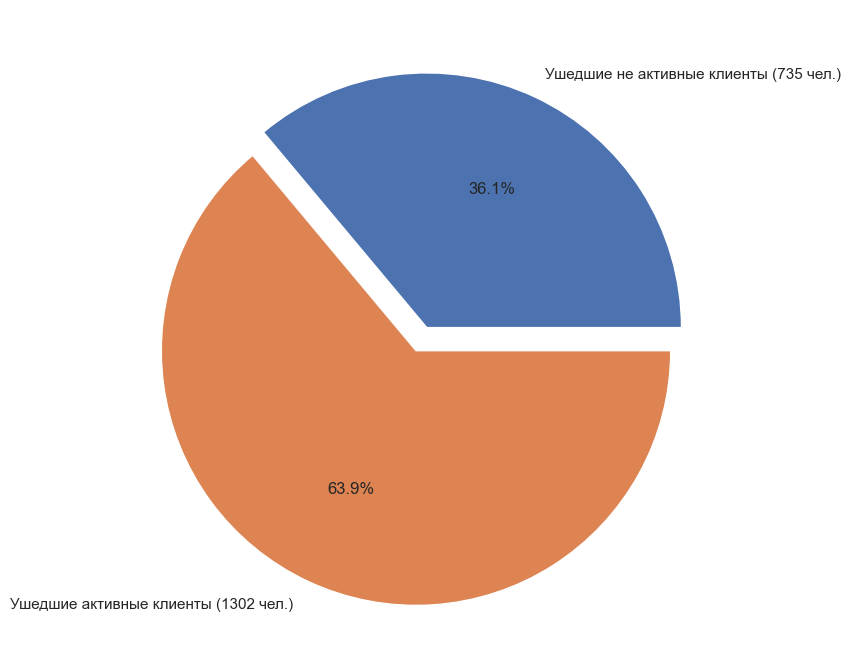

In [30]:
Vals = [735, 1302]
plt.pie(Vals, 
        labels = ['Ушедшие не активные клиенты (735 чел.) ', 'Ушедшие активные клиенты (1302 чел.) '],
        explode = (0, 0.1),
        autopct='%1.1f%%',
        )

plt.show()

9.8
Данная круговая диаграмма показывает соотношение активных и не активных ушедших клиентов банка. Я бы порекомендовал банку улучшить индивидуальный подход к активным клиентам,поскольку 63.9 % это очень большая доля среди всех ушедших клиентов и нужно разбираться чем не довольны активные пользовтели банка.

In [17]:
import plotly
import plotly.express as px

In [18]:
churn_data.groupby('Exited')['Geography'].value_counts()

Exited  Geography
0       France       4204
        Spain        2064
        Germany      1695
1       Germany       814
        France        810
        Spain         413
Name: Geography, dtype: int64

In [19]:
Count_Data = {
'Geography':['Germany', 'France', 'Spain'],
'Exited':[814, 810, 413]}
result = pd.DataFrame(Count_Data)
print (result)

  Geography  Exited
0   Germany     814
1    France     810
2     Spain     413


In [20]:
fig = px.choropleth(
    data_frame=Count_Data, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color='Exited', #от чего зависит цвет
    range_color=[0, 1000], #диапазон цвета
    title='География ушедших клиентов', #заголовок
    width=1200, #ширина
    height=800, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()
 #animation_frame="date", #анимационный бегунок


9.9
Данная тепловая карта отображает количество ушедших клиентов с привязкой к стране.  Исходя из данных можно сделать вывод что в датасете рассматриваются всего 3 страны и большая часть ушедших клиентов проживали во Франции и Германии, видимо в данных странах мало или вовсе отсутсвуют отделения рассматриваемого банка.

In [21]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [22]:
import pandas as pd
import numpy as np

In [23]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

churn_data.pivot_table(
               index = 'CreditScoreCat',
               columns = 'Tenure',
               values = 'Exited',
               aggfunc = 'mean')

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


<AxesSubplot: xlabel='Tenure', ylabel='CreditScoreCat'>

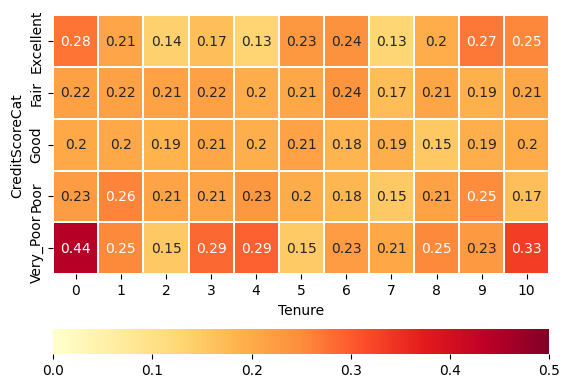

In [24]:
df = churn_data.pivot_table(
               index = 'CreditScoreCat',
               columns = 'Tenure',
               values = 'Exited',
               aggfunc = 'mean')
sns.heatmap(df, linewidths = 0.2, cmap='YlOrRd', annot = True, vmin=0, vmax=0.5, center= 0.25, cbar_kws= {'orientation': 'horizontal'}) 

Данная тепловая карта наглядно отображает катагории клиентов, которые чаще всего ухадят из банка и это клиенты с очнгь плохой кредитной историей. 
Среди клиентов с плохим кредитным рейтингом можно выделить Топ 3 категории по срокам пользования услугами банка: 0 лет, 10 лет, 3/4 года.